In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import re
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import tweepy
from textblob import TextBlob
import datetime
import time
import csv
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.preprocessing import Binarizer
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import TruncatedSVD
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


/Users/kislaynandan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
CONSUMER_KEY='X4MDIoCjcEsFnUuOV5t7Ramac'
CONSUMER_SECRET='4QEX8tdTBiWCP06XqAQITBUolwNou9l2xcQLHhoFyKduoazNhn'
ACCESS_KEY='2936608260-6TTgejpN0REXbUIeZdnNHcRnT9NXYNzYEkFSyxe'
ACCESS_SECRET='VLeGOTtztghXKp8I0eIumfDiBT8ZBoTVezsI702dH0gyd'

auth = tweepy.OAuth1UserHandler(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)
api = tweepy.API(auth)

def get_all_tweets(media1):
    tweets = []
    for account in media1:
        max_id = None
        tweet_count = 0
        while True:
            if max_id:
                recent_tweets = api.user_timeline(screen_name=account, count=200, max_id=max_id-1, tweet_mode="extended")
            else:
                recent_tweets = api.user_timeline(screen_name=account, count=200, tweet_mode="extended")
            if len(recent_tweets) == 0:
                break
            for tweet in recent_tweets:
                tweet_id = tweet.id
                created_at = tweet.created_at
                full_text = tweet.full_text
                if hasattr(tweet, "retweeted_status"):
                    try:
                        full_text = tweet.retweeted_status.full_text
                    except AttributeError:
                        full_text = tweet.retweeted_status.text
                screen_name = tweet.user.screen_name
                tweets.append((tweet_id, created_at, full_text, screen_name))
                tweet_count += 1
                if tweet_count == 5000:
                    break      
            if tweet_count == 5000:
                break
            max_id = recent_tweets[-1].id
    df = pd.DataFrame(tweets)
    return df

In [3]:
media1=['MacRumors','9to5mac','iMore','appleinsider','TechCrunch','MKBHD']
media1_corpus=get_all_tweets(media1)



In [7]:
sentiments = []
for tweet in media1_corpus.iloc[:,2]:
    blob = TextBlob(tweet)
    sentiment = blob.sentiment.polarity
    sentiments.append(sentiment)

media1_corpus['sentiment'] = sentiments
media1_corpus

,0,1,2,3,sentiment
0,1636844029290909697,2023-03-17 21:36:42+00:00,The 2023 Apple Watch Series 9: What to Expect ...,MacRumors,0.000000
1,1636821922909663232,2023-03-17 20:08:51+00:00,"Factory-Sealed Original iPhone Sells for $55,0...",MacRumors,0.375000
2,1636810915671842816,2023-03-17 19:25:07+00:00,Review: Yubico’s 5C NFC YubiKey Works Well Wit...,MacRumors,0.000000
3,1636808209154580482,2023-03-17 19:14:22+00:00,The MacRumors Show: What Health and Fitness Fe...,MacRumors,0.000000
4,1636784847363637248,2023-03-17 17:41:32+00:00,Best Apple Deals of the Week: Saint Patrick’s ...,MacRumors,0.500000
...,...,...,...,...,...
19485,1390666781711290368,2021-05-07 13:56:12+00:00,@SuperSaf @AndyManganelli I’m guessing a brand...,MKBHD,0.421591
19486,1390459498289111045,2021-05-07 00:12:32+00:00,Tech tip: get vaccinated,MKBHD,0.000000
19487,1390321353790824459,2021-05-06 15:03:36+00:00,Look at this graph 😅\n/u/C0RNL0RD https://t.co...,MKBHD,0.000000
19488,1390268556999331841,2021-05-06 11:33:48+00:00,Accidentally spent a week straight on a video ...,MKBHD,0.325000


In [15]:
df1 = media1_corpus[media1_corpus[2].str.contains("Iphone", case=False)].copy()
df1

,0,1,2,3
15,1653415880376844291,2023-05-02 15:07:19+00:00,Uber Eats Rolling Out Support for Tracking Ord...,MacRumors
24,1653090757002117136,2023-05-01 17:35:24+00:00,"Mother’s Day Deals: Save on iPhones, AirPods, ...",MacRumors
37,1652011726844600320,2023-04-28 18:07:43+00:00,Apple Pay Later Financing Feature Continues Ro...,MacRumors
49,1651585376161771520,2023-04-27 13:53:33+00:00,EarPods With USB-C Said to Be in Mass Producti...,MacRumors
53,1651532877174300680,2023-04-27 10:24:56+00:00,Future Apple Watch Update to Enable Pairing Wi...,MacRumors
...,...,...,...,...
19377,1408529128425504769,2021-06-25 20:54:48+00:00,Phone cameras are so good now compared to 10 y...,MKBHD
19403,1407335667252801536,2021-06-22 13:52:24+00:00,@theunlockr Definitely a huge driver. Who know...,MKBHD
19404,1407335195297079299,2021-06-22 13:50:32+00:00,It’s wild how there’s rumors and articles for ...,MKBHD
19454,1402597198215405577,2021-06-09 12:03:25+00:00,"NEW VIDEO - Why iPhone's Features are Always ""...",MKBHD


In [16]:

def clean_tweet(x):
    x = re.sub(r"@\S+", "", x)
    x = re.sub(r"http\S+", "", x)
    x = re.sub(r"[^a-zA-Z0-9 ]", "", x)
    x = x.lower().strip()
    return x
df1["cleaned_tweet"]=df1.loc[:,2].apply(clean_tweet)
df1

,0,1,2,3,cleaned_tweet
15,1653415880376844291,2023-05-02 15:07:19+00:00,Uber Eats Rolling Out Support for Tracking Ord...,MacRumors,uber eats rolling out support for tracking ord...
24,1653090757002117136,2023-05-01 17:35:24+00:00,"Mother’s Day Deals: Save on iPhones, AirPods, ...",MacRumors,mothers day deals save on iphones airpods case...
37,1652011726844600320,2023-04-28 18:07:43+00:00,Apple Pay Later Financing Feature Continues Ro...,MacRumors,apple pay later financing feature continues ro...
49,1651585376161771520,2023-04-27 13:53:33+00:00,EarPods With USB-C Said to Be in Mass Producti...,MacRumors,earpods with usbc said to be in mass productio...
53,1651532877174300680,2023-04-27 10:24:56+00:00,Future Apple Watch Update to Enable Pairing Wi...,MacRumors,future apple watch update to enable pairing wi...
...,...,...,...,...,...
19377,1408529128425504769,2021-06-25 20:54:48+00:00,Phone cameras are so good now compared to 10 y...,MKBHD,phone cameras are so good now compared to 10 y...
19403,1407335667252801536,2021-06-22 13:52:24+00:00,@theunlockr Definitely a huge driver. Who know...,MKBHD,definitely a huge driver who knows how many pe...
19404,1407335195297079299,2021-06-22 13:50:32+00:00,It’s wild how there’s rumors and articles for ...,MKBHD,its wild how theres rumors and articles for li...
19454,1402597198215405577,2021-06-09 12:03:25+00:00,"NEW VIDEO - Why iPhone's Features are Always ""...",MKBHD,new video why iphones features are always late


In [17]:
# build the function to analyze semantic network

def build_semantic_network(df):
    stop_words = set(stopwords.words("english"))
    vectorizer = CountVectorizer(stop_words=stop_words, min_df=2, max_features=50)
    X = vectorizer.fit_transform(df["cleaned_tweet"].values)
    vocab = vectorizer.get_feature_names_out()
    binarizer = Binarizer()
    cooccurrence = binarizer.fit_transform(X.T.dot(X))
    n_components = min(cooccurrence.shape) - 1
    svd = TruncatedSVD(n_components=n_components)
    svd.fit(cooccurrence)
    X_svd = svd.transform(cooccurrence)
    distances = pairwise_distances(X_svd, metric="cosine")
    G = nx.Graph()
    G.add_nodes_from(vocab)
    for i, word1 in enumerate(vocab):
        for j, word2 in enumerate(vocab):
            if i < j and cooccurrence[i, j] > 0:
                G.add_edge(word1, word2, weight=cooccurrence[i, j])
    centrality = nx.eigenvector_centrality(G)
    node_sizes = [centrality[word] * 5000 for word in G.nodes()]
    nx.set_node_attributes(G, dict(zip(G.nodes(), node_sizes)), "size")
    return G, node_sizes, centrality

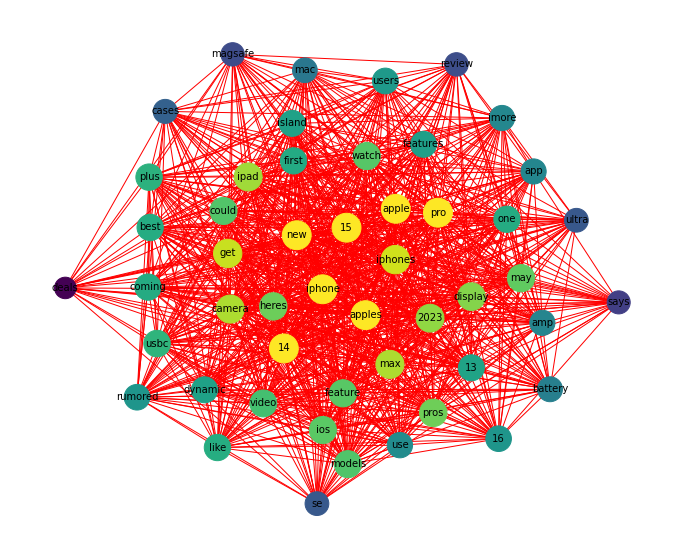

In [18]:

graph, node_sizes, centrality = build_semantic_network(df1)
fig, ax = plt.subplots(figsize=(12, 10))
nx.draw(graph, with_labels=True, node_size=node_sizes, node_color=list(centrality.values()), font_color='black', font_size=10,edge_color='red', ax=ax)
plt.show()

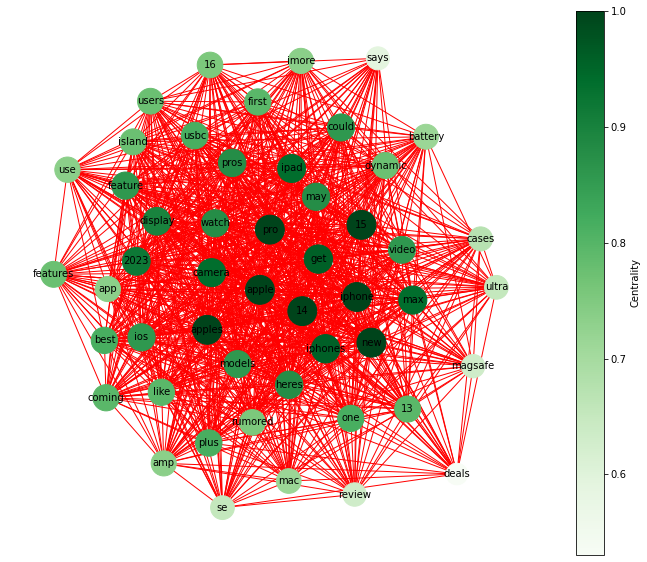

In [26]:
graph, node_sizes, centrality = build_semantic_network(df1)

# Compute the centrality measures
centrality = nx.degree_centrality(graph)

# Set the plot size
fig, ax = plt.subplots(figsize=(12, 10))

# Draw the network with node color based on centrality
nx.draw(graph, with_labels=True, node_size=node_sizes, node_color=list(centrality.values()), cmap=plt.cm.Greens, font_color='black', font_size=10, edge_color='red', ax=ax)

# Add a colorbar to show the centrality scale
sm = plt.cm.ScalarMappable(cmap=plt.cm.Greens, norm=plt.Normalize(vmin=min(centrality.values()), vmax=max(centrality.values())))
sm._A = []
cbar = plt.colorbar(sm)
cbar.set_label('Centrality')

plt.show()


In [19]:
centrality

{'13': 0.13537907837350383,
 '14': 0.1666766324641426,
 '15': 0.1666766324641426,
 '16': 0.13108670492634808,
 '2023': 0.1542979427970614,
 'amp': 0.12617916225362016,
 'app': 0.12653842708802396,
 'apple': 0.1666766324641426,
 'apples': 0.1666766324641426,
 'battery': 0.12426881106155517,
 'best': 0.13821104996374356,
 'camera': 0.15748213109795403,
 'cases': 0.11514957312801738,
 'coming': 0.13792948642429023,
 'could': 0.14664494618944846,
 'deals': 0.09237142526457193,
 'display': 0.15286418567181395,
 'dynamic': 0.13498319225474356,
 'feature': 0.14744758911715944,
 'features': 0.13415935471842239,
 'first': 0.1374499017299028,
 'get': 0.16053383543607438,
 'heres': 0.15000117006992153,
 'imore': 0.12674536163117187,
 'ios': 0.14754914109269854,
 'ipad': 0.1562273105652101,
 'iphone': 0.1666766324641426,
 'iphones': 0.16131698927873203,
 'island': 0.13498319225474356,
 'like': 0.13849798540208533,
 'mac': 0.1219289562127618,
 'magsafe': 0.10934438732143903,
 'max': 0.1575820466423

<Figure size 576x576 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

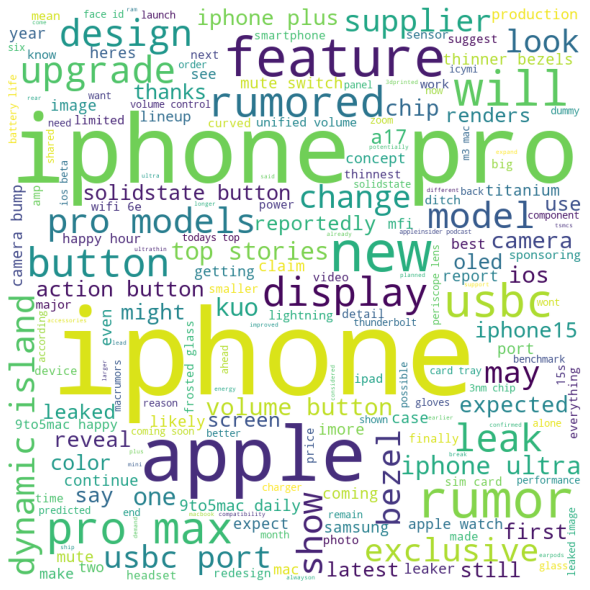

In [8]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# load the data from CSV file into a dataframe
#df1 = pd.read_csv('your_file_path.csv')

# concatenate all the tweets into a single string
all_tweets = ' '.join(df1['cleaned_tweet'].tolist())

# create a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(all_tweets)

# plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# show the plot
plt.show()


In [11]:
from textblob import TextBlob
import pandas as pd

reviews = df1

def extract_concerns(reviews):
    all_text = ' '.join(reviews)
    blob = TextBlob(all_text)
    noun_phrases = blob.noun_phrases
    phrase_counts = {}
    for phrase in noun_phrases:
        if phrase in phrase_counts:
            phrase_counts[phrase] += 1
        else:
            phrase_counts[phrase] = 1
    sorted_phrases = sorted(phrase_counts.items(), key=lambda x: x[1], reverse=True)
    return [phrase[0] for phrase in sorted_phrases[:10]]
concerns = extract_concerns(reviews['cleaned_tweet'])
print('The most common concerns are:')
for concern in concerns:
    print('- ' + concern)


The most common concerns are:
- pro max
- pro models
- dynamic island
- kuo iphone
- solidstate buttons
- top stories iphone
- happy hour
- action button
- usbc port
- exclusive iphone


In [10]:
sia = SentimentIntensityAnalyzer()
def extract_positive_words(sentence):
    words = nltk.word_tokenize(sentence)
    tagged_words = nltk.pos_tag(words)
    positive_words = [word[0].lower() for word in tagged_words
                      if (word[1].startswith('JJ') or
                          word[1].startswith('RB') or
                          word[1].startswith('JJR') or
                          word[1].startswith('RBR') ) and
                      sia.polarity_scores(word[0])['pos'] > sia.polarity_scores(word[0])['neg'] 
                      #or sia.polarity_scores(word[0])['pos'] < sia.polarity_scores(word[0])['neg']
                     ]

    return positive_words
posword = df1
posword['Positive Words'] = posword['cleaned_tweet'].apply(lambda x: extract_positive_words(x))
posword = posword.dropna(subset=['Positive Words'])
new_df = pd.DataFrame(columns=['Positive Word'])

for i, row in posword.iterrows():
    words = row['Positive Words']
    for word in words:
        new_df = pd.concat([new_df, pd.DataFrame({'Positive Word': [word]})], ignore_index=True)

print("The most common Positive words are:")
if len(new_df) > 0:
    print("-", '\n- '.join(new_df['Positive Word'].unique().tolist()))
else:
    print("No positive words found.")

print("\nTop 5 common repeated positives words are:")
if len(posword) > 0:
    print(posword['Positive Words'].explode().value_counts().head(5))
else:
    print("No positive phrases found.")


The most common Positive words are:
- top
- exclusive
- active
- dynamic
- huge
- fab
- unified
- better
- wish
- significant
- increased
- best
- happy
- improved
- well
- special
- efficient
- truly
- beautiful
- secure
- fine
- great
- grateful
- glorious
- good
- true
- hopefully
- solid
- powerful
- favorite
- fascinating

Top 5 common repeated positives words are:
dynamic      20
exclusive    18
top          15
happy         8
best          7
Name: Positive Words, dtype: int64
